In [12]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [15]:
#load the data
df = pd.read_csv('owid-covid-data.csv')

In [17]:
#check the data
print(df)

     iso_code      continent     location        date  total_cases  new_cases  \
0         AFG           Asia  Afghanistan  2020-02-24          5.0        5.0   
1         AFG           Asia  Afghanistan  2020-02-25          5.0        0.0   
2         AFG           Asia  Afghanistan  2020-02-26          5.0        0.0   
3         AFG           Asia  Afghanistan  2020-02-27          5.0        0.0   
4         AFG           Asia  Afghanistan  2020-02-28          5.0        0.0   
...       ...            ...          ...         ...          ...        ...   
7979      ABW  North America        Aruba  2021-10-02      15533.0       19.0   
7980      ABW  North America        Aruba  2021-10-03      15536.0        3.0   
7981      ABW  North America        Aruba  2021-10-04      15543.0        7.0   
7982      ABW  North America        Aruba  2021-10-05      15560.0       17.0   
7983      ABW  North America        Aruba  2021-10-06      15578.0        1.0   

      new_cases_smoothed  t

In [18]:
# Display Basic Information
print('DataFrame Shape:', df.shape)
df.info()

DataFrame Shape: (7984, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    7984 non-null   object 
 1   continent                                   7232 non-null   object 
 2   location                                    7984 non-null   object 
 3   date                                        7984 non-null   object 
 4   total_cases                                 7881 non-null   float64
 5   new_cases                                   7877 non-null   float64
 6   new_cases_smoothed                          7786 non-null   float64
 7   total_deaths                                7152 non-null   float64
 8   new_deaths                                  7172 non-null   float64
 9   new_deaths_smoothed                         7082 non-null

In [13]:
# Preview the First Few Rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [15]:
# Check for Missing Values
missing_values = df.isnull().sum()
print('\nMissing Values by Column:\n', missing_values[missing_values > 0])


Missing Values by Column:
 continent                                   752
total_cases                                 103
new_cases                                   107
new_cases_smoothed                          198
total_deaths                                832
                                           ... 
human_development_index                    2033
excess_mortality_cumulative_absolute       7876
excess_mortality_cumulative                7876
excess_mortality                           7876
excess_mortality_cumulative_per_million    7876
Length: 64, dtype: int64


In [16]:
# Summary Statistics
df.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7984,7232,7984,7984,7.881000e+03,7877.000000,7786.000000,7152.000000,7172.000000,7082.000000,...,3771.000000,3771.000000,2959.000000,4501.000000,7231.000000,5951.000000,108.000000,108.000000,108.000000,108.000000
unique,11,5,11,795,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,North America,Argentina,2021-03-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,795,2004,795,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,7.201196e+05,2727.498286,2753.697614,18443.695330,56.403793,57.011538,...,10.893662,39.737709,61.064656,3.074406,75.201059,0.739230,6066.164815,15.851481,27.682963,1380.546704
std,NaN,NaN,NaN,NaN,1.939191e+06,8808.446555,8598.002847,46560.516373,149.872008,142.073192,...,10.527250,10.250925,28.835252,1.509281,6.666512,0.117441,10611.202381,15.385741,37.780877,1772.666950
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.700000,27.700000,26.664000,0.500000,61.150000,0.511000,-7413.600000,-9.150000,-27.480000,-585.446884
25%,NaN,NaN,NaN,NaN,1.469000e+03,4.000000,12.857000,84.000000,0.000000,0.286000,...,1.500000,30.400000,37.746000,1.900000,75.090000,0.748000,15.025000,1.897500,0.997500,57.822641
50%,NaN,NaN,NaN,NaN,2.972600e+04,92.000000,100.286000,1217.000000,3.000000,3.571000,...,7.100000,37.800000,83.741000,3.800000,76.880000,0.778000,176.050000,13.460000,19.310000,675.565323
75%,NaN,NaN,NaN,NaN,1.728160e+05,602.000000,616.464500,5342.750000,15.000000,16.143000,...,16.200000,51.200000,94.043000,4.200000,78.570000,0.845000,10612.550000,31.495000,45.690000,2213.792271


In [12]:
# Data Cleaning

# Filter for Specific Countries (e.g., USA, India, South Africa, Kenya)
selected_countries = ['United States', 'India', 'South Africa', 'Kenya']
df_filtered = df[df['location'].isin(selected_countries)]

In [13]:
# Convert Date Column to Datetime Format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

In [14]:
# Make a copy of the filtered data
df_filtered = df[df['location'].isin(selected_countries)].copy()

# Handle missing numeric values
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns
df_filtered[numeric_columns] = df_filtered[numeric_columns].fillna(0)  # or interpolate



In [15]:
# Verify Cleaning Results
print('\nFiltered DataFrame Shape:', df_filtered.shape)
df_filtered.info()
df_filtered.head()



Filtered DataFrame Shape: (0, 67)
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    0 non-null      object 
 1   continent                                   0 non-null      object 
 2   location                                    0 non-null      object 
 3   date                                        0 non-null      object 
 4   total_cases                                 0 non-null      float64
 5   new_cases                                   0 non-null      float64
 6   new_cases_smoothed                          0 non-null      float64
 7   total_deaths                                0 non-null      float64
 8   new_deaths                                  0 non-null      float64
 9   new_deaths_smoothed                         0 non-null      float64
 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [35]:
print(df_filtered[['location', 'total_cases', 'total_deaths', 'new_cases']].groupby('location').sum())


Empty DataFrame
Columns: [total_cases, total_deaths, new_cases]
Index: []


In [39]:
df_filtered[['total_cases', 'total_deaths', 'new_cases']] = df_filtered[['total_cases', 'total_deaths', 'new_cases']].replace(0, np.nan).interpolate()


In [40]:
print(df_filtered['date'].dtypes)


object


In [42]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])


In [43]:
plt.figure(figsize=(16, 10))


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [44]:
print(df_filtered.shape)


(0, 67)


In [4]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

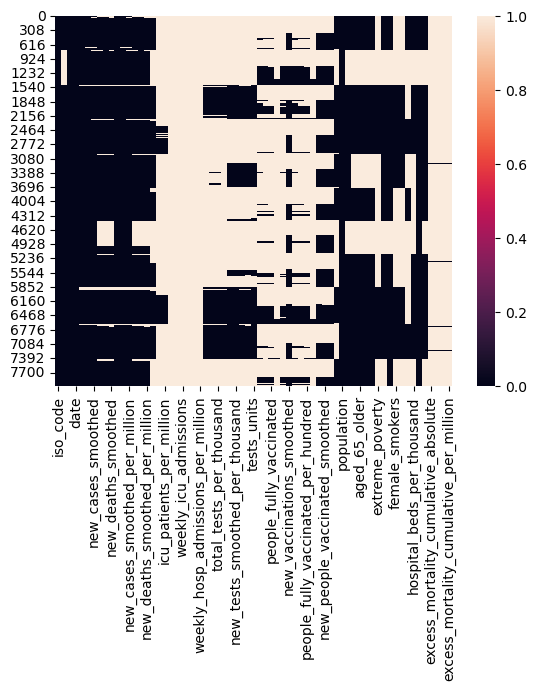

In [20]:
sns.heatmap(df.isnull())
plt.show()

In [36]:
#Plot total cases over time for selected countries.
#df.groupby('region')['cases', 'death'].sum()



In [37]:
df.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [40]:
df.groupby('location').sum().head(20)

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGA...,AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAs...,2020-02-242020-02-252020-02-262020-02-272020-0...,5.858849e+07,174339.0,1.737293e+05,2552442.0,7622.0,7609.709,1.470763e+06,...,0.0,0.0,27969.786,370.5,48039.03,378.651,0.0,0.00,0.00,0.000000
Africa,OWID_AFROWID_AFROWID_AFROWID_AFROWID_AFROWID_A...,0,2020-02-132020-02-142020-02-152020-02-162020-0...,3.204841e+09,11254551.0,1.123262e+07,79384040.0,248969.0,248644.003,2.333362e+06,...,0.0,0.0,0.000,0.0,0.00,0.000,0.0,0.00,0.00,0.000000
Albania,ALBALBALBALBALBALBALBALBALBALBALBALBALBALBALBA...,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,2020-02-252020-02-262020-02-272020-02-282020-0...,7.090225e+07,272030.0,2.716421e+05,1174101.0,3478.0,3471.883,2.467939e+07,...,5254.0,37888.0,0.000,2138.6,58141.80,588.300,148755.4,470.94,831.30,51778.216973
Algeria,DZADZADZADZADZADZADZADZADZADZADZADZADZADZADZAD...,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,2020-02-252020-02-262020-02-272020-02-282020-0...,8.354047e+07,265227.0,2.650596e+05,2363443.0,6853.0,6840.570,1.872407e+06,...,518.0,22496.0,61968.340,1406.0,56891.20,553.520,210466.2,139.60,328.62,4717.214610
Andorra,ANDANDANDANDANDANDANDANDANDANDANDANDANDANDANDA...,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,2020-03-022020-03-032020-03-042020-03-052020-0...,7.933979e+06,38434.0,3.823088e+04,69474.0,151.0,149.614,1.025671e+08,...,21286.0,27745.2,0.000,0.0,61457.82,637.112,649.0,321.42,315.25,8389.999224
Angola,AGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOA...,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,2020-03-202020-03-212020-03-222020-03-232020-0...,2.226468e+07,98796.0,9.875115e+04,525494.0,1903.0,1878.019,6.561246e+05,...,0.0,0.0,19091.424,0.0,43783.40,415.996,0.0,0.00,0.00,0.000000
Anguilla,AIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAA...,North AmericaNorth AmericaNorth AmericaNorth A...,2020-03-282020-03-292020-03-302020-03-312020-0...,2.772790e+05,2555.0,2.549292e+03,742.0,10.0,8.866,1.833250e+07,...,0.0,0.0,0.000,0.0,57971.04,0.000,0.0,0.00,0.00,0.000000
Antigua and Barbuda,ATGATGATGATGATGATGATGATGATGATGATGATGATGATGATGA...,North AmericaNorth AmericaNorth AmericaNorth A...,2020-03-132020-03-142020-03-152020-03-162020-0...,1.119701e+06,7457.0,7.437445e+03,27655.0,135.0,133.458,1.134127e+07,...,0.0,0.0,0.000,2747.4,55685.46,562.494,-261.3,-56.99,-97.35,-2646.665586
Argentina,ARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGA...,South AmericaSouth AmericaSouth AmericaSouth A...,2020-01-012020-01-022020-01-032020-01-042020-0...,2.097200e+09,8934328.0,8.914295e+06,43271301.0,126708.0,126396.423,4.598535e+07,...,12879.0,22021.5,0.000,3975.0,60952.65,671.775,92242.8,20.50,155.03,2022.610139


In [ ]:
#df.groupby('location')['death'].sum().sort_values(ascending=false)head(20)

In [ ]:
df.groupby('location')['death].sum().sort_values(ascending = false)